In [2]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import csv
from collections import defaultdict
from math import log

In [61]:
directory = "/Users/swaniejuhng/Desktop/FCN_data/saturation/datasets"
pathname = directory+"/dataScaleFree_10_10_*_16000_B.txt"
files = glob.glob(pathname, recursive=True)
# files = filter(filter_rho_max, files)
split_files = [file.split("/Users/swaniejuhng/Desktop/FCN_data/saturation/datasets/")[-1] for file in files]
split_files.sort()
# for file in split_files:
#     print(file)

In [116]:
fig5_data_one = []

with open("/Users/swaniejuhng/Desktop/FCN_data/errors_one_hidden_layer.csv", "r") as r:
    reader = csv.reader(r)
    for i, row in enumerate(reader):
        if i == 0: continue
        file = row[0].split("/content/gdrive/My Drive/CSE 534/Project/FCN_data/saturation_1/")[-1]
        if file in split_files:
            rho_max = int(file.split("dataScaleFree_10_10_")[-1].split("_16000_B.txt")[0])
            with open("/Users/swaniejuhng/Desktop/FCN_data/saturation/datasets/"+file, "r") as r:
                lines = r.readlines()
                sum_traffic = 0; num_traffic = 0
                for line in lines:
                    traffic = line.split()[:100]
                    traffic = [float(t) for t in traffic]
                    sum_traffic += sum(traffic)
                    num_traffic += len(traffic)
                avg_traffic = sum_traffic/num_traffic
                if avg_traffic <= 2:
                    fig5_data_one.append([avg_traffic, float(row[1])])

fig5_data_one.sort(key=lambda x: x[0])
fig5_data_one = [[t[0] for t in fig5_data_one], [t[1] for t in fig5_data_one]]

In [117]:
fig5_data_two = []

with open("/Users/swaniejuhng/Desktop/FCN_data/errors_saturation.csv", "r") as r:
    reader = csv.reader(r)
    for i, row in enumerate(reader):
        if i == 0: continue
        file = row[0].split("/content/gdrive/My Drive/CSE 534/Project/FCN_data/saturation_1/")[-1]
        if file in split_files:
            rho_max = int(file.split("dataScaleFree_10_10_")[-1].split("_16000_B.txt")[0])
            with open("/Users/swaniejuhng/Desktop/FCN_data/saturation/datasets/"+file, "r") as r:
                lines = r.readlines()
                sum_traffic = 0; num_traffic = 0; count = 0
                for line in lines:
                    traffic = line.split()[:100]
                    traffic = [float(t) for t in traffic]
                    sum_traffic += sum(traffic)
                    num_traffic += len(traffic)
                    count += 1
                avg_traffic = sum_traffic/num_traffic
                if avg_traffic <= 2:
                    fig5_data_two.append([avg_traffic, float(row[1])])

fig5_data_two.sort(key=lambda x: x[0])
fig5_data_two = [[t[0] for t in fig5_data_two], [t[1] for t in fig5_data_two]]

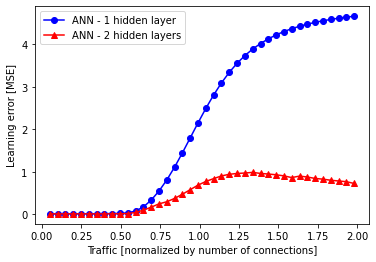

In [118]:
plt.plot(fig5_data_one[0], fig5_data_one[1], label="ANN - 1 hidden layer", color="blue", marker="o")
plt.plot(fig5_data_two[0], fig5_data_two[1], label="ANN - 2 hidden layers", color="red", marker="^")
plt.xlabel("Traffic [normalized by number of connections]")
plt.ylabel("Learning error [MSE]")
plt.legend()
plt.show()

In [51]:
ring_data = []
star_data = []
scalefree_data = []

with open("/Users/swaniejuhng/Desktop/FCN_data/errors_topology4.csv", "r") as r:
    reader = csv.reader(r)
    for i, row in enumerate(reader):
        if i == 0: continue
        if "Star" in row[0]:
            node = int(row[0].split("dataStar_")[-1].split("_")[0])
            star_data.append([node, float(row[1])])
        elif "Ring" in row[0]:
            node = int(row[0].split("dataRing_")[-1].split("_")[0])
            ring_data.append([node, float(row[1])])
        elif "ScaleFree" in row[0]:
            node = int(row[0].split("dataScaleFree_")[-1].split("_")[0])
            scalefree_data.append([node, float(row[1])])
            
ring_data.sort(key=lambda x: x[0])
star_data.sort(key=lambda x: x[0])
scalefree_data.sort(key=lambda x: x[0])

# star
star_dict = defaultdict(list)
for s in star_data:
    star_dict[s[0]].append(s[1])
star_data = []
for k, v in star_dict.items():
    star_data.append([k, sum(v)/len(v)])
# ring
ring_dict = defaultdict(list)
for r in ring_data:
    ring_dict[r[0]].append(r[1])
ring_data = []
for k, v in ring_dict.items():
    ring_data.append([k, sum(v)/len(v)])
# scale-free
scalefree_dict = defaultdict(list)
for sc in scalefree_data:
    scalefree_dict[sc[0]].append(sc[1])
scalefree_data = []
for k, v in scalefree_dict.items():
    scalefree_data.append([k, sum(v)/len(v)])

ring_data = [[r[0] for r in ring_data], [r[1] for r in ring_data]]
star_data = [[s[0] for s in star_data], [s[1] for s in star_data]]
scalefree_data = [[sf[0] for sf in scalefree_data[:-1]], [sf[1] for sf in scalefree_data[:-1]]]

print("RING")
print(ring_data)
print()
print("STAR")
print(star_data)
print()
print("SCALE-FREE")
print(scalefree_data)

RING
[[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], [0.0007262844465003582, 0.0022861563138576457, 0.005705385752662551, 0.01256977211596677, 0.030481976398732513, 0.13478673325434717, 1.364304871764034, 5.504109361022711, 6.918958514928818, 4.71152981184423, 2.82791449688375, 1.7807052554562688, 1.450762121938169]]

STAR
[[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], [0.0007209119412436849, 0.0014149243461361038, 0.0021236714055703487, 0.002809833174978848, 0.003423458978431882, 0.0035213922601542436, 0.0034430239520588657, 0.003313360135507537, 0.0031878195295576006, 0.0030731818478670903, 0.0029653176898136735, 0.00287185117485933, 0.0027845592994708572]]

SCALE-FREE
[[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], [0.0003345956338018859, 0.0009076763150034591, 0.001540384941368497, 0.0024001234578752213, 0.0036005738139566444, 0.004581654200419074, 0.005698571563698351, 0.006533784464755584, 0.009329905136606642, 0.004981764667992673, 0.012162664269525853, 0.007263622326140721, 0.

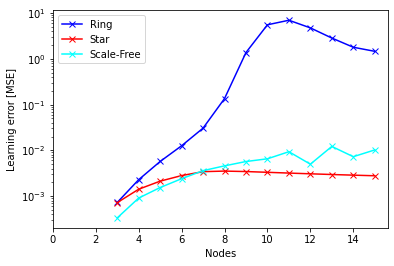

In [106]:
plt.plot(ring_data[0], ring_data[1], label="Ring", color="blue", marker="x")
plt.plot(star_data[0], star_data[1], label="Star", color="red", marker="x")
plt.plot(scalefree_data[0], scalefree_data[1], label="Scale-Free", color="cyan", marker="x")
plt.xlim(xmin=0)
plt.yscale("log")
plt.xlabel("Nodes")
plt.ylabel("Learning error [MSE]")
plt.legend()
plt.show()

# Ring network -> high congestion (in the "Understanding~" paper)
# Scale Free - why worse than from the paper?
# Star network: evened-out network -> easier to predict

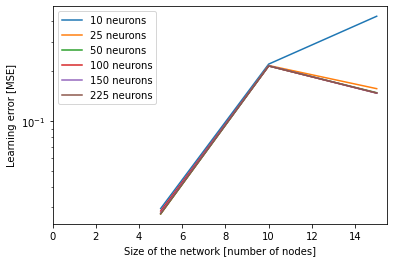

In [115]:
data = []
with open("/Users/swaniejuhng/Desktop/FCN_data/Nodes_vs_Neurons.csv", "r") as r:
    reader = csv.reader(r)
    for i, row in enumerate(reader):
        if i == 0: continue
        node = int(row[0].split("dataScaleFree_")[-1].split("_")[0])
        data.append([node, float(row[1]), int(row[2])])

data.sort(key=lambda x: x[0])

def rearrange(neuron_array):
    return [[n[0] for n in neuron_array], [n[1] for n in neuron_array]]

neuron_10 = [d for d in data if d[2] == 10]
neuron_10 = rearrange(neuron_10)
neuron_25 = [d for d in data if d[2] == 25]
neuron_25 = rearrange(neuron_25)
neuron_50 = [d for d in data if d[2] == 50]
neuron_50 = rearrange(neuron_50)
neuron_100 = [d for d in data if d[2] == 100]
neuron_100 = rearrange(neuron_100)
neuron_150 = [d for d in data if d[2] == 150]
neuron_150 = rearrange(neuron_150)
neuron_225 = [d for d in data if d[2] == 225]
neuron_225 = rearrange(neuron_225)

# plt.figure(figsize=(10, 20))

plt.plot(neuron_10[0], neuron_10[1], label="10 neurons")
plt.plot(neuron_25[0], neuron_25[1], label="25 neurons")
plt.plot(neuron_50[0], neuron_50[1], label="50 neurons")
plt.plot(neuron_100[0], neuron_100[1], label="100 neurons")
plt.plot(neuron_150[0], neuron_150[1], label="150 neurons")
plt.plot(neuron_225[0], neuron_225[1], label="225 neurons")

plt.xlim(xmin=0)
# plt.ylim([0.04, 0.40])
plt.yscale("log")
plt.xlabel("Size of the network [number of nodes]")
plt.ylabel("Learning error [MSE]")
plt.legend()
plt.show()

# criticize the paper for using too many neurons for networks of few nodes

# using 10 neurons wasn't enough to encode the graph & traffic information
# but then any number over 25 is enough?
# the authors of the paper ran the DL neural network for too many epochs - overfitting issue